In [9]:
# Import the Pandas package
import pandas as pd

# Import the NumPy package
import numpy as np

In [2]:
df = pd.read_csv('yellow_trips.csv')

In [3]:
# Look at the head of the DataFrame (i.e. the top rows of the DataFrame)
df.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount
0,2014-04-03 18:28:10,2014-04-03 18:54:32,-74.006033,40.706284,-73.918837,40.744946,1,8.70,34.8
1,2014-04-16 15:42:00,2014-04-16 16:07:00,-73.979558,40.749357,0.000000,0.000000,1,9.37,30.0
2,2014-04-13 18:04:00,2014-04-13 18:07:00,-73.956453,40.775307,-73.954792,40.784992,1,0.89,6.5
3,2014-05-21 19:33:00,2014-05-21 19:45:00,-73.987212,40.757850,-73.960198,40.775472,1,2.40,12.5
4,2014-05-30 16:28:00,2014-05-30 16:51:00,-73.974292,40.755397,-74.011867,40.704222,3,5.58,24.5


In [5]:
df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount
count,7.974059e+06,7.974059e+06,7.974059e+06,7.974059e+06,7.974059e+06,7.974059e+06,7.974059e+06
mean,-7.244694e+01,3.990894e+01,-7.246507e+01,3.991985e+01,1.688382e+00,1.659788e+01,1.560997e+01
std,1.052101e+01,5.796364e+00,1.046042e+01,5.763262e+00,1.346068e+00,1.063671e+04,1.347520e+01
min,-1.800000e+02,-1.800000e+02,-7.364167e+02,-1.800000e+02,0.000000e+00,0.000000e+00,-2.188000e+02
25%,-7.399203e+01,4.073474e+01,-7.399137e+01,4.073344e+01,1.000000e+00,1.030000e+00,8.300000e+00
50%,-7.398172e+01,4.075247e+01,-7.397979e+01,4.075291e+01,1.000000e+00,1.770000e+00,1.175000e+01
75%,-7.396661e+01,4.076706e+01,-7.396233e+01,4.076824e+01,2.000000e+00,3.220000e+00,1.740000e+01
max,1.720110e+02,6.220818e+01,1.720110e+02,4.043000e+02,9.000000e+00,1.180001e+07,6.770300e+03


In [4]:
geo = pd.read_csv('geographic.csv')

In [5]:
geo.head()

,BK88,QN52,QN48,QN51,QN27,BX35,BX98,QN07,MN06,QN02,...,MN25,MN24,MN23,MN13,MN15,MN32,MN33,MN99,QN18,QN29
0,-73.976051,-73.794934,-73.775740,-73.803792,-73.861099,-73.896967,-73.872873,-73.757258,-73.946080,-73.760316,...,-74.000784,-73.992605,-73.989904,-74.001535,-73.993833,-73.938048,-73.935054,-74.010930,-73.858726,-73.867911
1,40.631284,40.757806,40.743334,40.775618,40.763673,40.834350,40.785983,40.718147,40.821271,40.675118,...,40.694295,40.724145,40.734443,40.762653,40.772940,40.780838,40.791695,40.684500,40.735717,40.744942
2,-73.977167,-73.794749,-73.775799,-73.800991,-73.859931,-73.896787,-73.872886,-73.755890,-73.946404,-73.758806,...,-74.000960,-73.992634,-73.989870,-74.001339,-73.993789,-73.937903,-73.935108,-74.011934,-73.858672,-73.867877
3,40.630755,40.755636,40.743326,40.775397,40.762209,40.834133,40.785971,40.716307,40.820580,40.673014,...,40.694077,40.724065,40.733535,40.762217,40.772912,40.780758,40.791658,40.683896,40.735627,40.744824
4,-73.977000,-73.794579,-73.778060,-73.798653,-73.859668,-73.896303,-73.872983,-73.754702,-73.946720,-73.758598,...,-74.003015,-73.993093,-73.990028,-74.001279,-73.993727,-73.937796,-73.935173,-74.012177,-73.858585,-73.867852


In [6]:
pip install shapely

     |████████████████████████████████| 1.5MB 1.4MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install descartes

Note: you may need to restart the kernel to use updated packages.


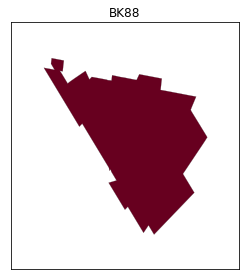

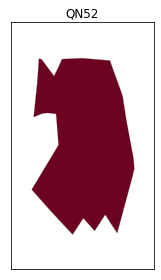

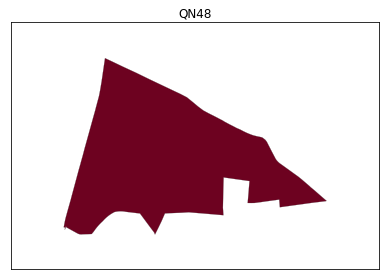

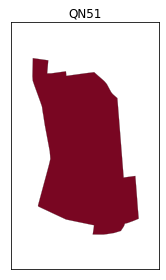

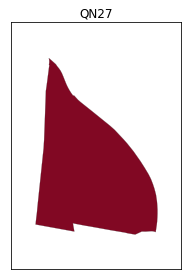

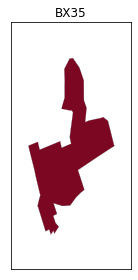

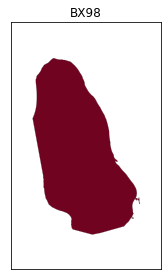

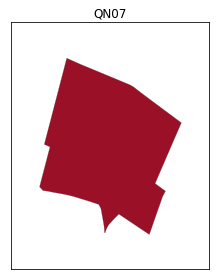

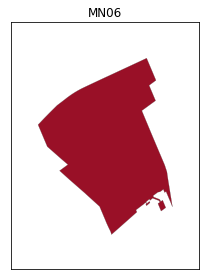

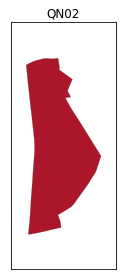

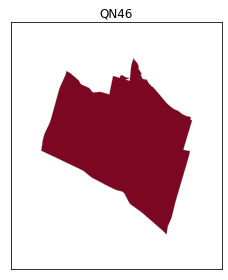

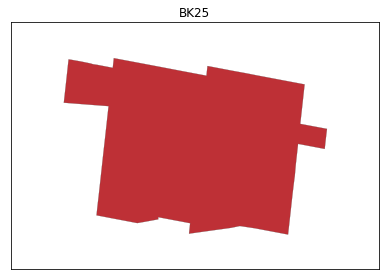

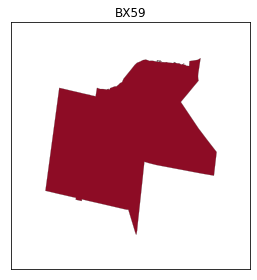

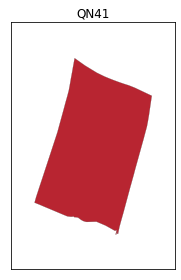

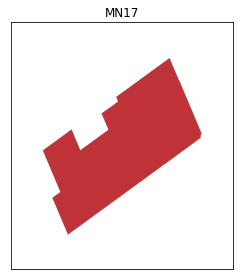

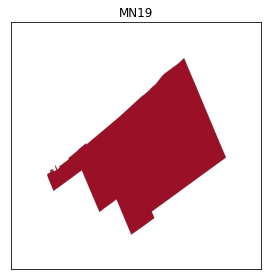

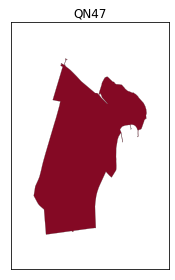

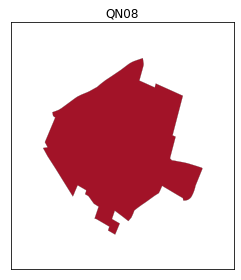

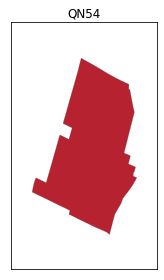

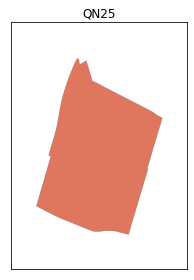

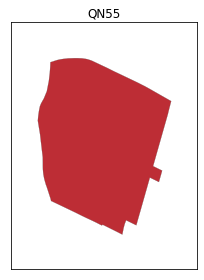

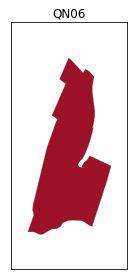

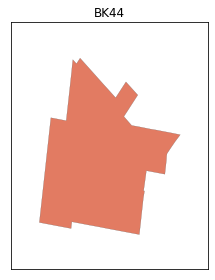

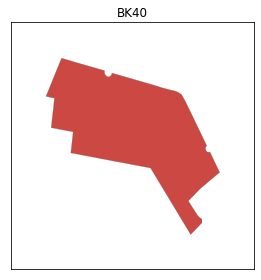

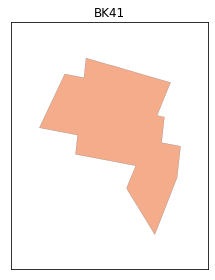

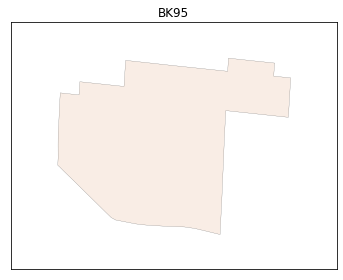

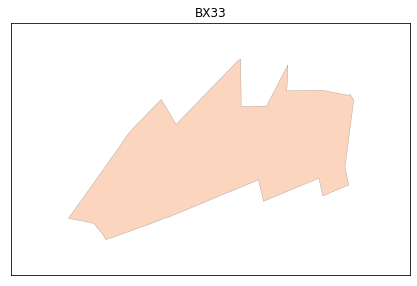

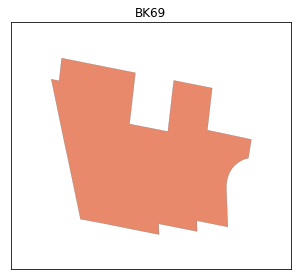

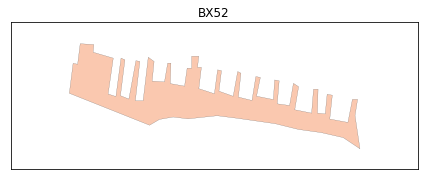

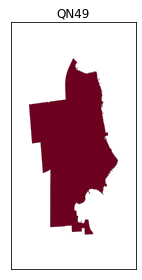

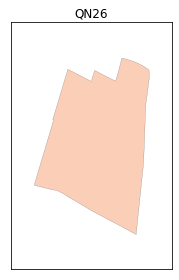

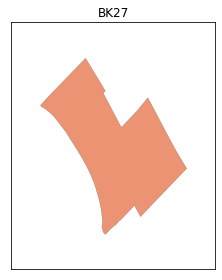

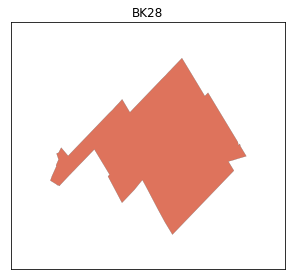

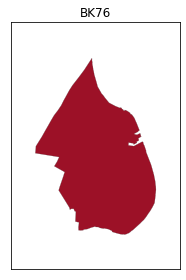

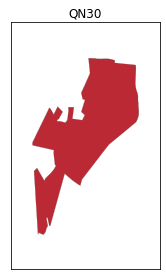

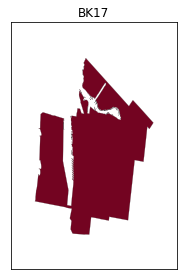

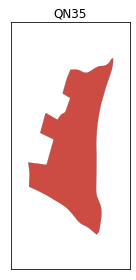

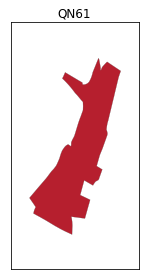

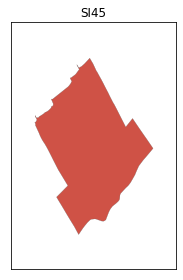

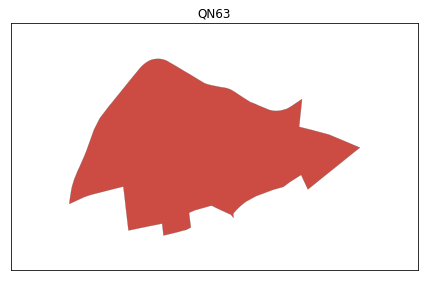

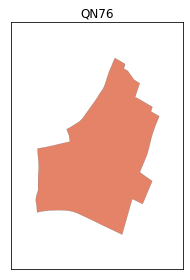

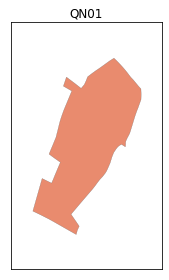

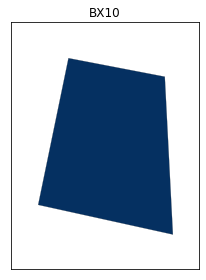

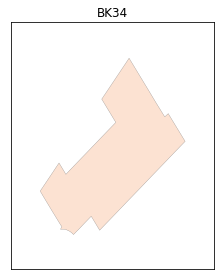

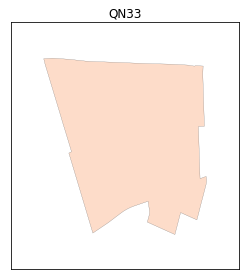

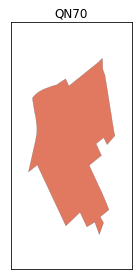

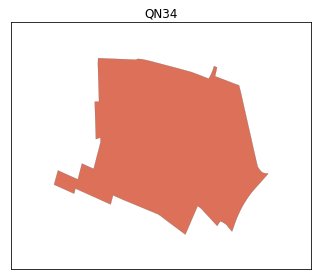

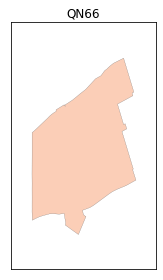

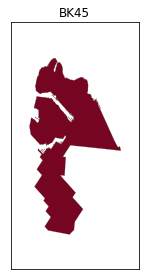

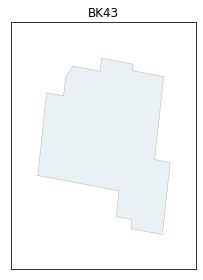

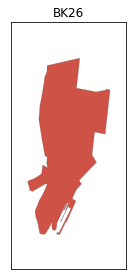

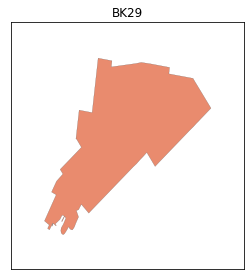

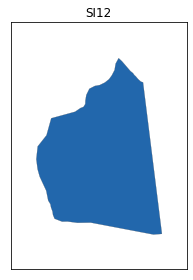

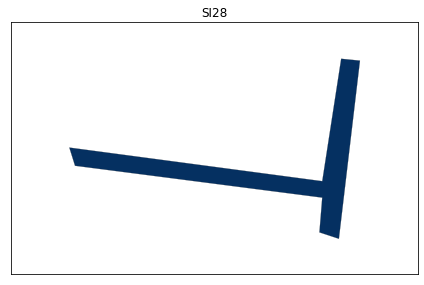

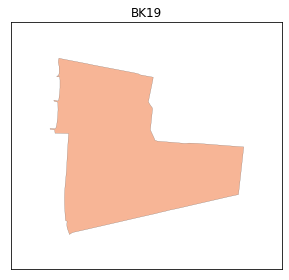

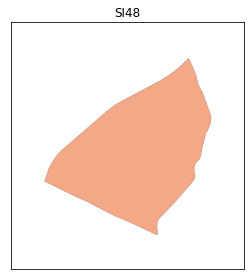

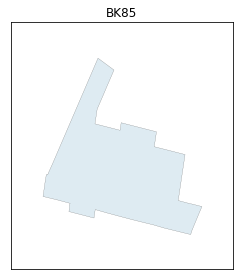

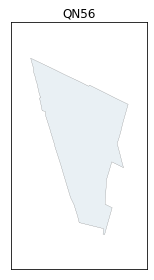

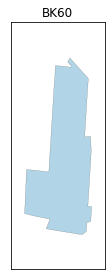

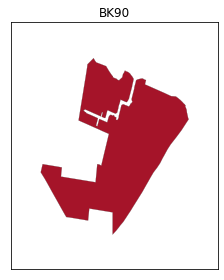

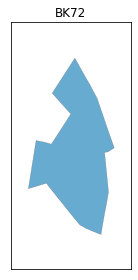

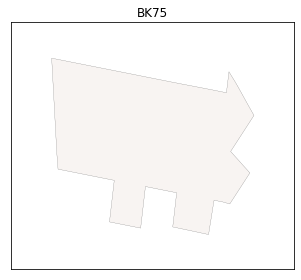

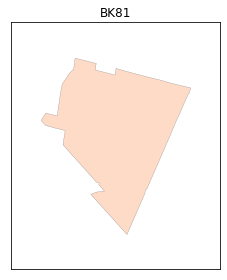

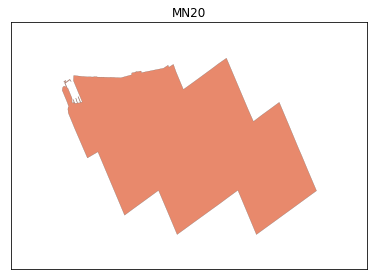

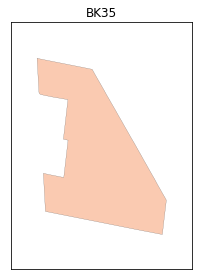

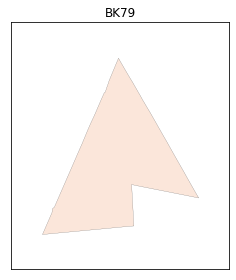

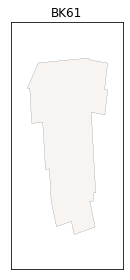

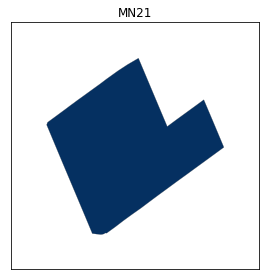

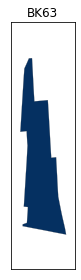

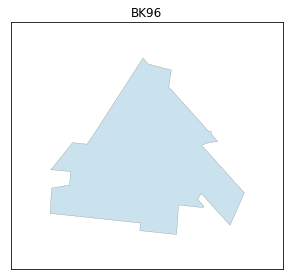

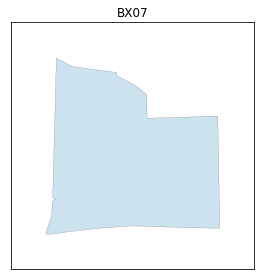

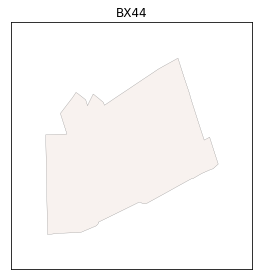

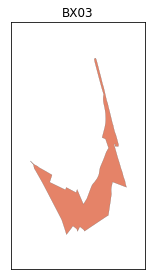

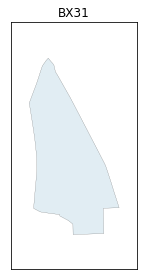

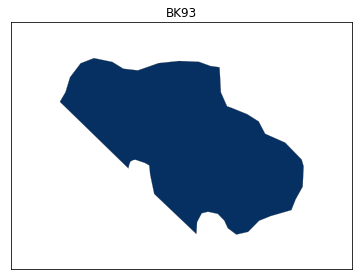

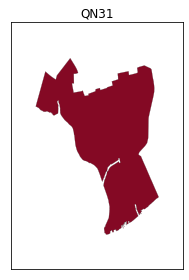

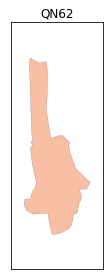

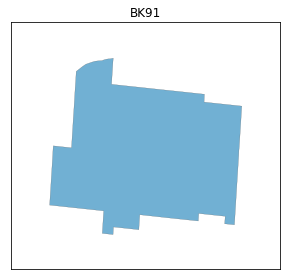

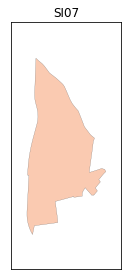

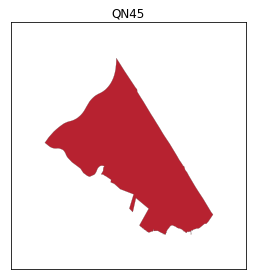

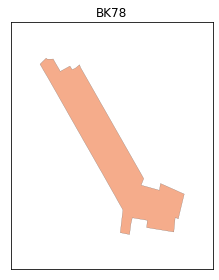

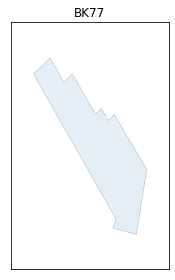

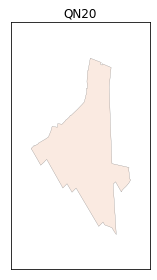

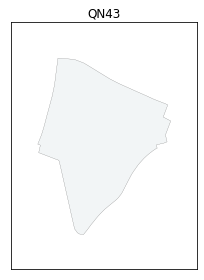

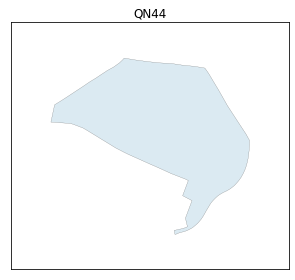

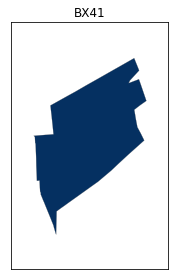

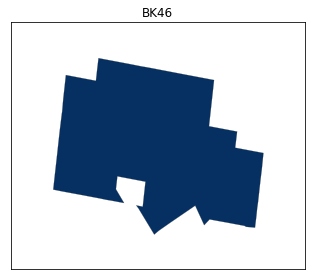

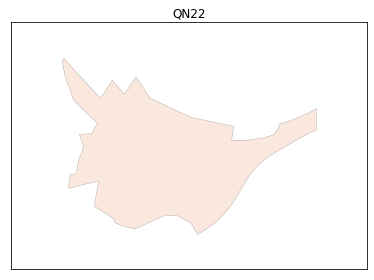

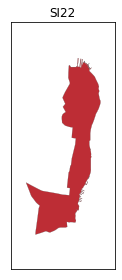

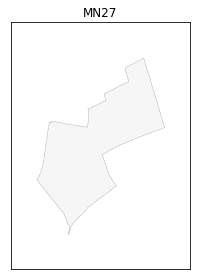

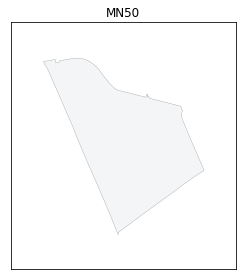

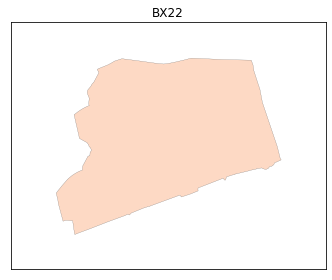

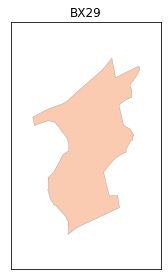

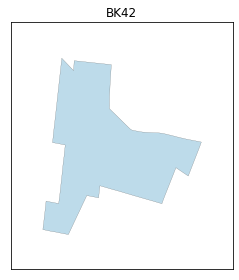

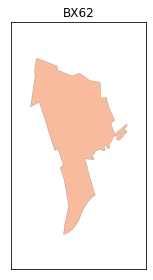

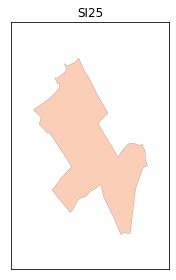

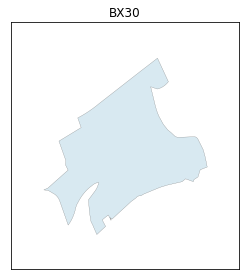

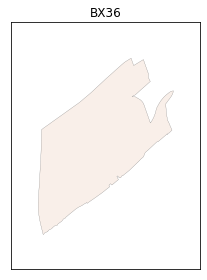

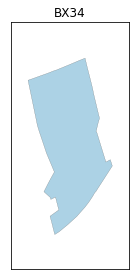

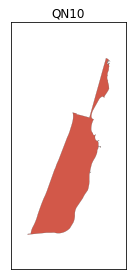

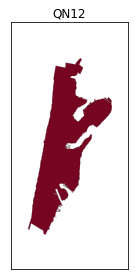

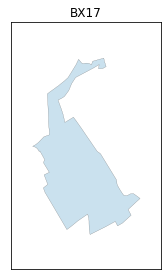

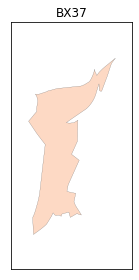

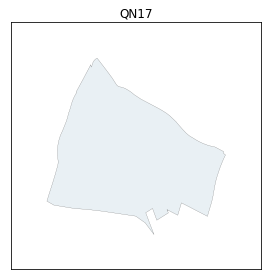

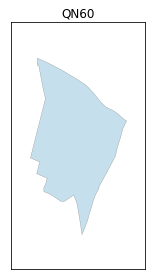

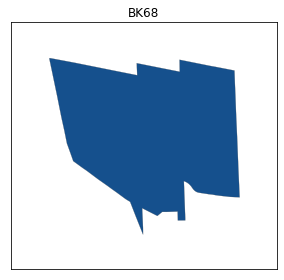

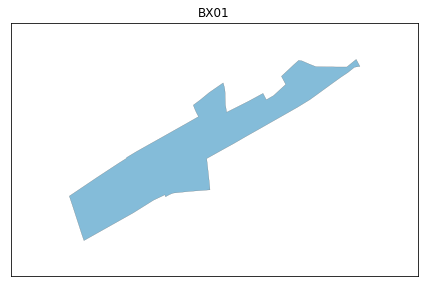

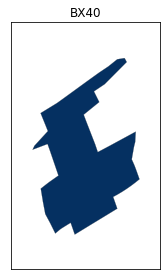

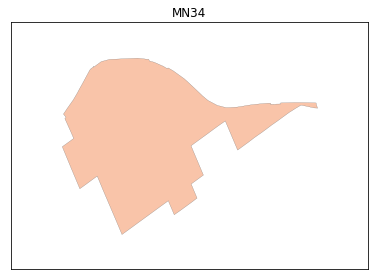

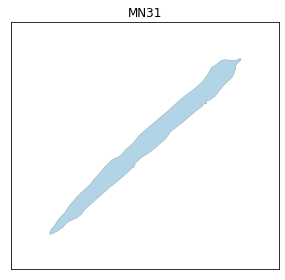

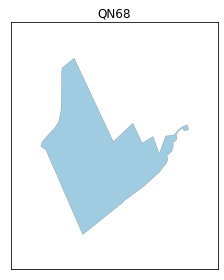

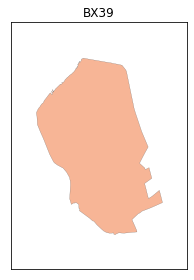

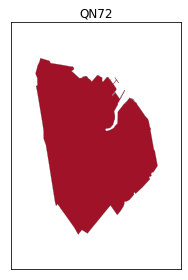

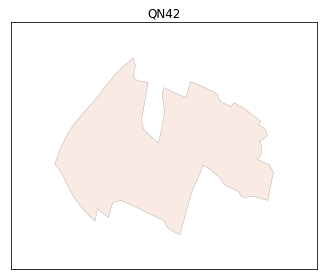

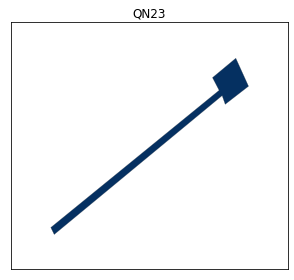

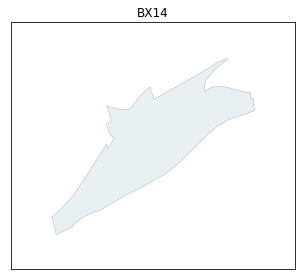

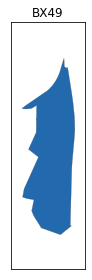

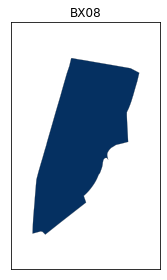

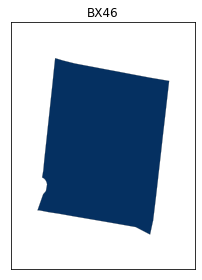

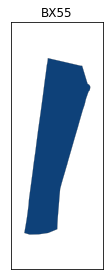

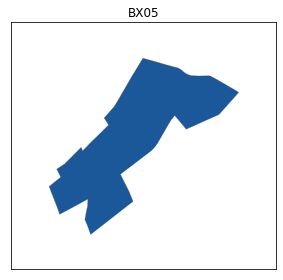

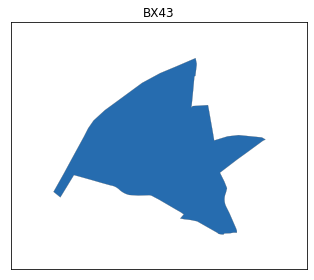

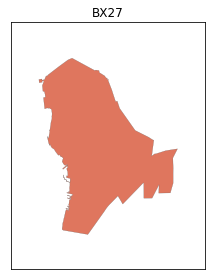

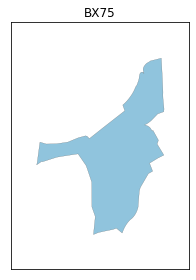

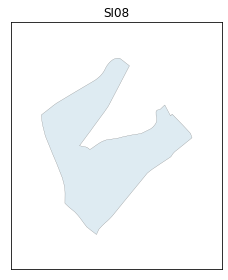

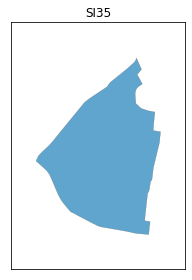

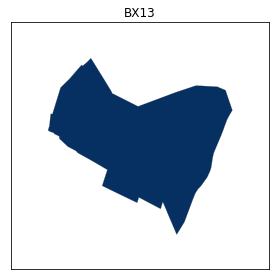

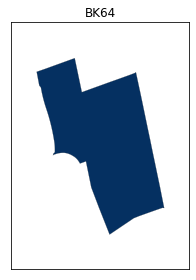

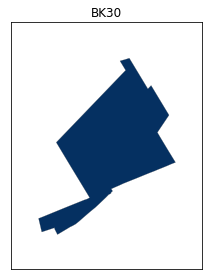

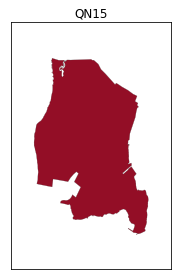

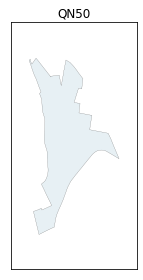

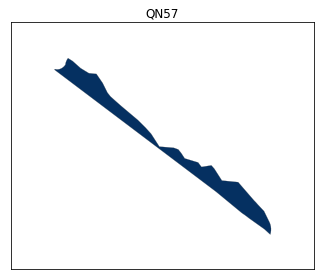

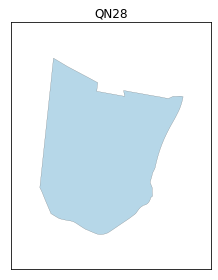

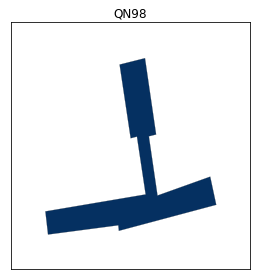

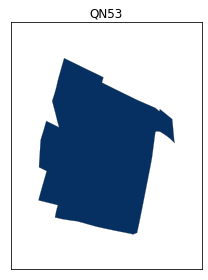

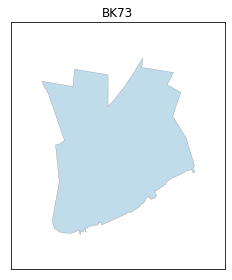

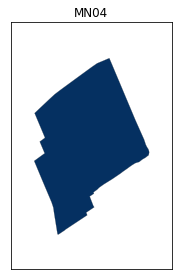

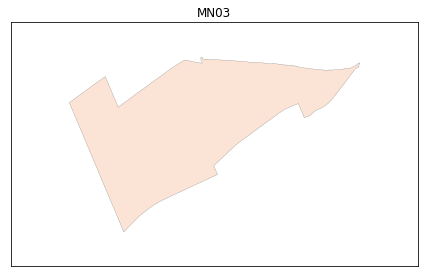

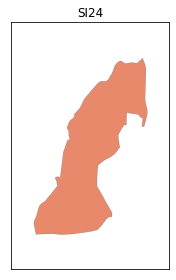

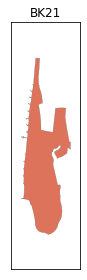

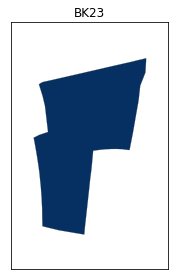

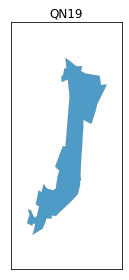

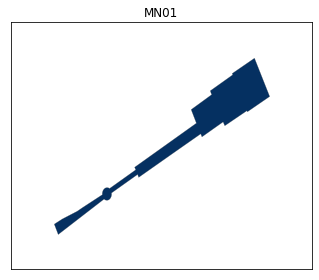

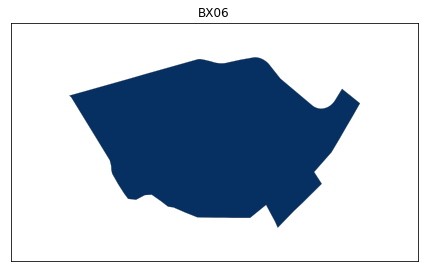

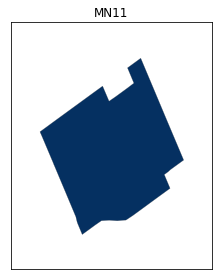

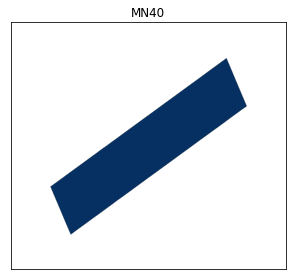

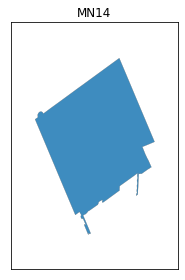

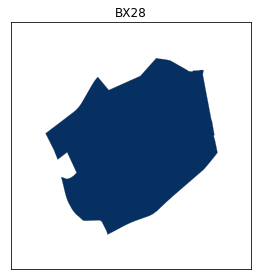

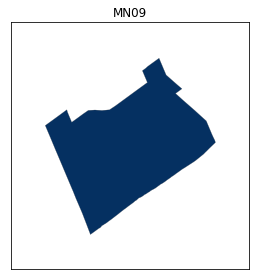

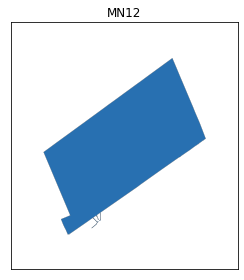

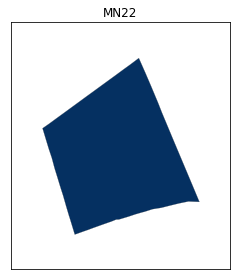

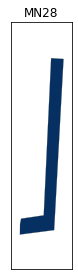

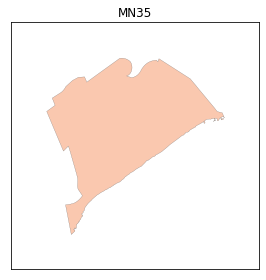

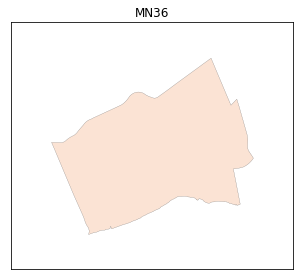

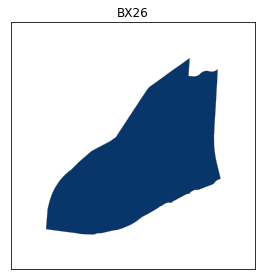

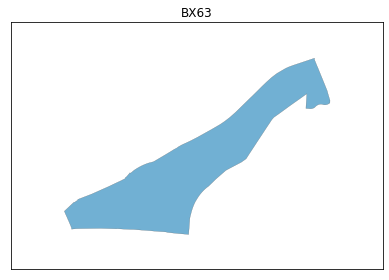

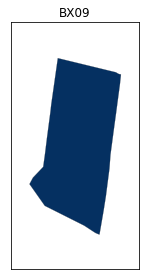

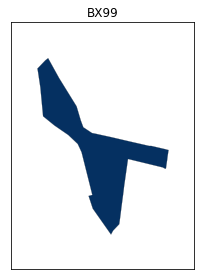

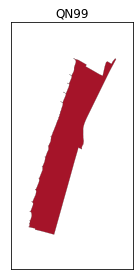

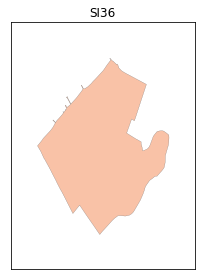

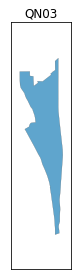

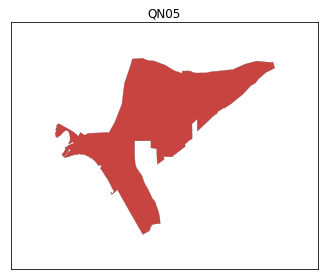

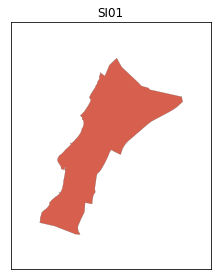

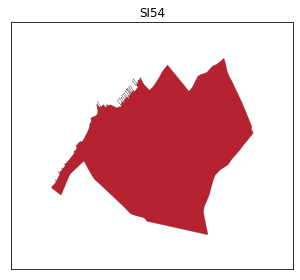

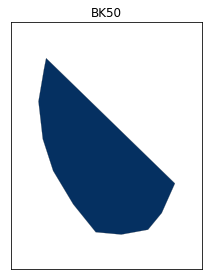

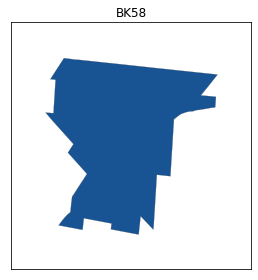

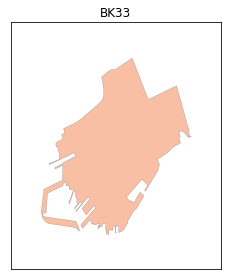

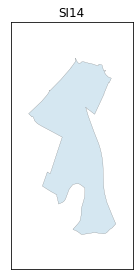

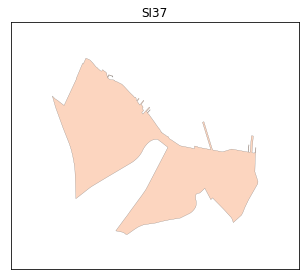

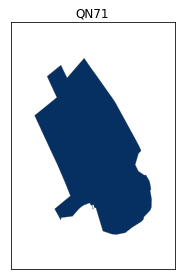

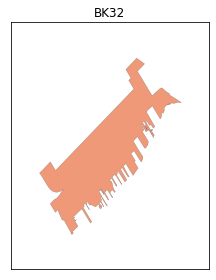

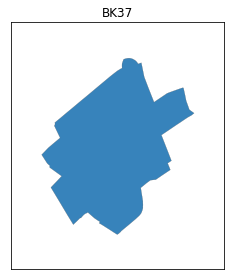

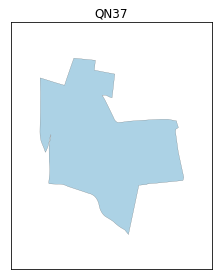

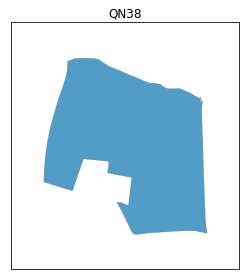

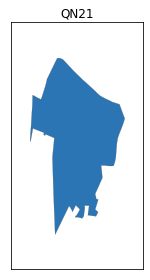

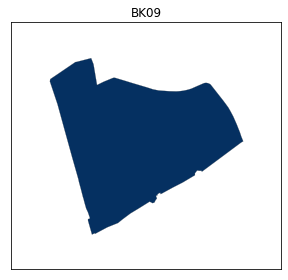

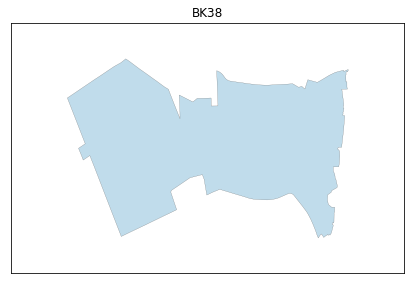

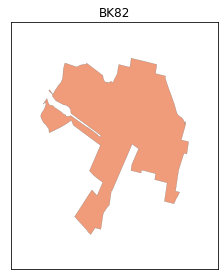

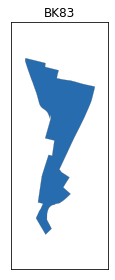

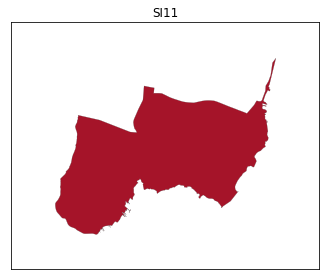

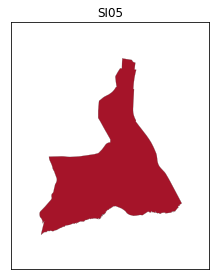

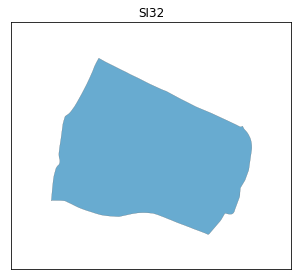

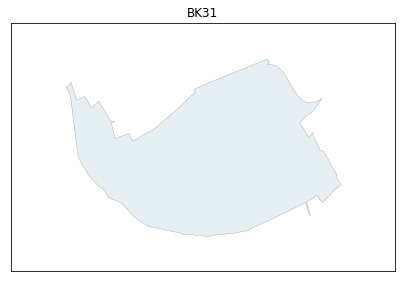

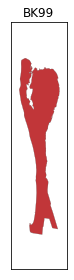

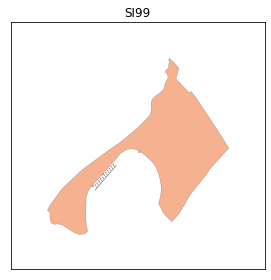

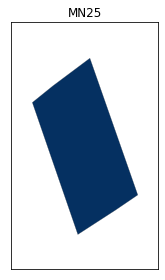

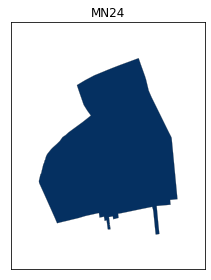

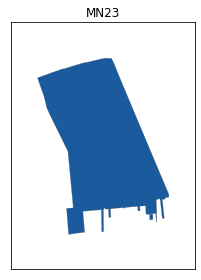

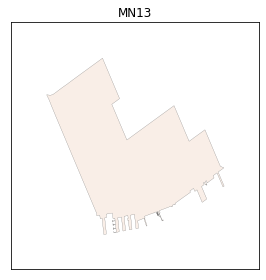

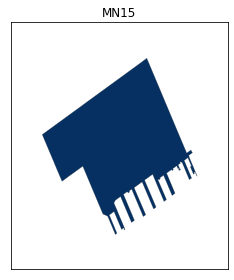

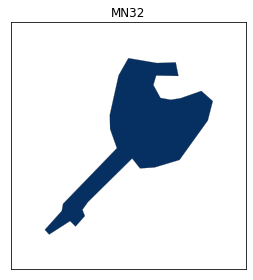

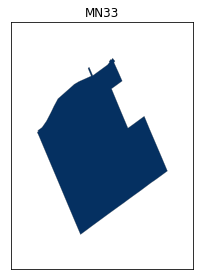

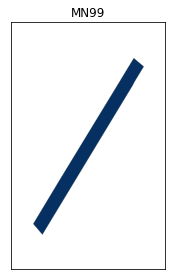

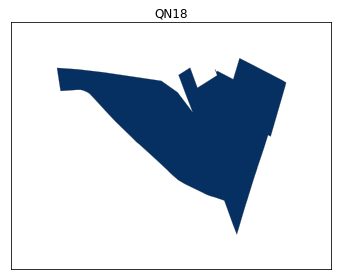

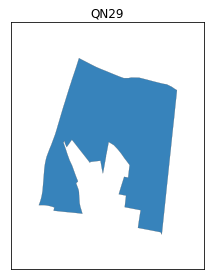

In [10]:
from shapely.geometry import MultiPoint,Point,Polygon
import matplotlib.pyplot as plt
from descartes import PolygonPatch
from matplotlib.collections import PatchCollection
zone_ids = list(geo.columns)

patches = []
polygons = {}

for idx,zone in enumerate(zone_ids):
    long = geo[geo[zone].notnull()][zone].values[::2].tolist()
    lat = geo[geo[zone].notnull()][zone].values[1::2].tolist()

    coords = list(zip(lat, long))
    poly = MultiPoint(coords)
    polygon = Polygon(tuple(zip(lat, long)))
    minx, miny, maxx, maxy = poly.bounds
    cm = plt.get_cmap('RdBu')
    num_colours = len(poly)
    
    colour = cm(1. * idx / num_colours)
    cur_patch = PolygonPatch(polygon, fc=colour, ec='#555555', lw=0.2, alpha=1., zorder=1)
    
    polygons[zone] = polygon
    patches.append(cur_patch)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    minx, miny, maxx, maxy = poly.bounds
    w, h = maxx - minx, maxy - miny
    ax.set_xlim(minx - 0.2 * w, maxx + 0.2 * w)
    ax.set_ylim(miny - 0.2 * h, maxy + 0.2 * h)
    ax.set_aspect(1)
    ax.add_collection(PatchCollection([cur_patch], match_original=True))
    ax.set_xticks([])
    ax.set_yticks([])
    plt.title(zone)
    plt.tight_layout()
    #plt.savefig('data/london_from_shp.png', alpha=True, dpi=300)
    plt.show()

In [12]:
def get_zone(x,y):
    coord = Point(x,y)
    for p in polygons:
        #if coord.within(polygons[p]):
        if polygons[p].contains(coord):
            return(p)
    return np.nan
        
#coords = df[df.columns[2:4]].apply(get_zone, axis=1)  
#polygon.contains(point)
#coords = df.apply(lambda x: get_zone(x['pickup_latitude'],x['pickup_longitude']), axis=1)
#df['zone'] = get_zone(df['pickup_latitude'],df['pickup_longitude'])

d = df[0:100]

import time

t = time.process_time()

d['nta_code'] = d.apply(lambda x: get_zone(x['pickup_latitude'],x['pickup_longitude']), axis=1)
#coords = [get_zone()]
#print([lat,long for lat,long in d[['pickup_latitude','pickup_longitude']].iterTuples()])
elapsed_time = time.process_time() - t

print('time taken: ',elapsed_time)
d.to_csv('nta_results.csv')
print(d['nta_code'])

time taken:  0.28400831599999776
0      NaN
1     MN20
2      NaN
3     MN17
4     MN19
5     MN20
6     MN13
7     MN17
8     MN22
9     MN19
10    MN17
11    MN13
12    MN19
13     NaN
14    MN15
15    QN31
16     NaN
17    MN12
18    MN40
19     NaN
20    MN40
21    MN23
22    MN22
23    MN23
24    MN24
25    MN17
26    MN17
27     NaN
28     NaN
29    MN17
      ... 
70    MN13
71    MN15
72    MN21
73    MN27
74    MN40
75    MN13
76     NaN
77    MN40
78    MN40
79    MN24
80    MN14
81     NaN
82    MN40
83     NaN
84     NaN
85    MN17
86    MN24
87    MN17
88    MN40
89    MN17
90    QN68
91     NaN
92    MN14
93     NaN
94    MN12
95    MN50
96    MN19
97    MN19
98    QN31
99     NaN
Name: nta_code, Length: 100, dtype: object


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
d.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount,nta_code
0,2014-04-03 18:28:10,2014-04-03 18:54:32,-74.006033,40.706284,-73.918837,40.744946,1,8.70,34.8,NaN
1,2014-04-16 15:42:00,2014-04-16 16:07:00,-73.979558,40.749357,0.000000,0.000000,1,9.37,30.0,MN20
2,2014-04-13 18:04:00,2014-04-13 18:07:00,-73.956453,40.775307,-73.954792,40.784992,1,0.89,6.5,NaN
3,2014-05-21 19:33:00,2014-05-21 19:45:00,-73.987212,40.757850,-73.960198,40.775472,1,2.40,12.5,MN17
4,2014-05-30 16:28:00,2014-05-30 16:51:00,-73.974292,40.755397,-74.011867,40.704222,3,5.58,24.5,MN19


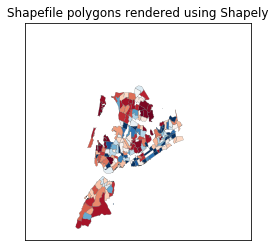

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
minx, miny, maxx, maxy = poly.bounds
w, h = (maxx - minx)*20, (maxy - miny)*15

ax.set_xlim(minx - w, maxx + w)
ax.set_ylim(miny - h, maxy + h)
ax.set_aspect(1)
ax.add_collection(PatchCollection(patches, match_original=True))
ax.set_xticks([])
ax.set_yticks([])
plt.title("Shapefile polygons rendered using Shapely")
plt.show()

In [91]:
!pip install descartes

In [15]:
list(geo.columns)

['BK88',
 'QN52',
 'QN48',
 'QN51',
 'QN27',
 'BX35',
 'BX98',
 'QN07',
 'MN06',
 'QN02',
 'QN46',
 'BK25',
 'BX59',
 'QN41',
 'MN17',
 'MN19',
 'QN47',
 'QN08',
 'QN54',
 'QN25',
 'QN55',
 'QN06',
 'BK44',
 'BK40',
 'BK41',
 'BK95',
 'BX33',
 'BK69',
 'BX52',
 'QN49',
 'QN26',
 'BK27',
 'BK28',
 'BK76',
 'QN30',
 'BK17',
 'QN35',
 'QN61',
 'SI45',
 'QN63',
 'QN76',
 'QN01',
 'BX10',
 'BK34',
 'QN33',
 'QN70',
 'QN34',
 'QN66',
 'BK45',
 'BK43',
 'BK26',
 'BK29',
 'SI12',
 'SI28',
 'BK19',
 'SI48',
 'BK85',
 'QN56',
 'BK60',
 'BK90',
 'BK72',
 'BK75',
 'BK81',
 'MN20',
 'BK35',
 'BK79',
 'BK61',
 'MN21',
 'BK63',
 'BK96',
 'BX07',
 'BX44',
 'BX03',
 'BX31',
 'BK93',
 'QN31',
 'QN62',
 'BK91',
 'SI07',
 'QN45',
 'BK78',
 'BK77',
 'QN20',
 'QN43',
 'QN44',
 'BX41',
 'BK46',
 'QN22',
 'SI22',
 'MN27',
 'MN50',
 'BX22',
 'BX29',
 'BK42',
 'BX62',
 'SI25',
 'BX30',
 'BX36',
 'BX34',
 'QN10',
 'QN12',
 'BX17',
 'BX37',
 'QN17',
 'QN60',
 'BK68',
 'BX01',
 'BX40',
 'MN34',
 'MN31',
 'QN68',
 

In [11]:
print(geo)

           BK88       QN52       QN48       QN51       QN27       BX35  \
0    -73.976051 -73.794934 -73.775740 -73.803792 -73.861099 -73.896967   
1     40.631284  40.757806  40.743334  40.775618  40.763673  40.834350   
2    -73.977167 -73.794749 -73.775799 -73.800991 -73.859931 -73.896787   
3     40.630755  40.755636  40.743326  40.775397  40.762209  40.834133   
4    -73.977000 -73.794579 -73.778060 -73.798653 -73.859668 -73.896303   
5     40.629880  40.753571  40.742995  40.775209  40.761910  40.833552   
6    -73.976851 -73.794629 -73.778601 -73.798531 -73.859137 -73.896474   
7     40.629097  40.752711  40.742916  40.775199  40.761427  40.833056   
8    -73.976697 -73.794657 -73.779658 -73.798234 -73.859125 -73.896694   
9     40.628363  40.751996  40.742738  40.774857  40.761284  40.831974   
10   -73.976579 -73.794685 -73.780367 -73.797855 -73.858968 -73.896902   
11    40.627581  40.751283  40.742600  40.774424  40.761167  40.831042   
12   -73.976516 -73.794720 -73.780687 

In [105]:
zones = pd.read_csv('zones.csv')

In [106]:
zones.head()

,location_id,borough,zone,service_zone,nta_code
0,1,EWR,Newark Airport,EWR,NJ01
1,2,Queens,Jamaica Bay,Boro Zone,QN61
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone,BX31
3,4,Manhattan,Alphabet City,Yellow Zone,MN22
4,5,Staten Island,Arden Heights,Boro Zone,SI48


In [187]:
merge_df = pd.merge(d,zones[['nta_code','borough','zone']],how = 'inner', on = 'nta_code', suffixes=('','_NTA'))
merge_df.groupby(['borough'])['nta_code'].count()

borough
Bronx            77
Brooklyn       4857
Manhattan    276701
Queens         1816
Name: nta_code, dtype: int64

In [194]:
d.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount,nta_code
0,2014-04-03 18:28:10,2014-04-03 18:54:32,-74.006033,40.706284,-73.918837,40.744946,1,8.70,34.8,NaN
1,2014-04-16 15:42:00,2014-04-16 16:07:00,-73.979558,40.749357,0.000000,0.000000,1,9.37,30.0,MN20
2,2014-04-13 18:04:00,2014-04-13 18:07:00,-73.956453,40.775307,-73.954792,40.784992,1,0.89,6.5,NaN
3,2014-05-21 19:33:00,2014-05-21 19:45:00,-73.987212,40.757850,-73.960198,40.775472,1,2.40,12.5,MN17
4,2014-05-30 16:28:00,2014-05-30 16:51:00,-73.974292,40.755397,-74.011867,40.704222,3,5.58,24.5,MN19
